### Demension Reduction & Clustering

#### 1. Principal Component Analysis

PCA(Principle Component Analysis)는 관측당 많은 수의 차원/특징을 포함하는 데이터를 분석하고, 최대의 정보량을 보존하면서 데이터의 해석성을 올리는 통계학적 방법이다. 경제학에서는 계량경제학 분야에서 Fector Modeling을 구현할 때 주로 사용하였으며, 고전적인 방법에서부터 파생되었기 때문에 statsmodels와 sklearn모두 PCA를 구현하도록 되어 있다. 다만, 사용 목적에 따라서 쓰임새가 달라진다

**statsmodels**

```
statsmodels.multivariate.pca.PCA(data, ncomp=None, standardize=True, demean=True, 
                                 normalize=True, gls=False, weights=None, method='svd', 
                                 missing=None, tol=5e-08, max_iter=1000, tol_em=5e-08, 
                                 max_em_iter=100, svd_full_matrices=False)
```

**sklearn**

```
sklearn.decomposition.PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', 
                          tol=0.0, iterated_power='auto', n_oversamples=10, 
                          power_iteration_normalizer='auto', random_state=None)
```

**1.1 First component**

PCA는 데이터의 projection에 의해 계산된 가장 큰 분산을 만드는 좌표계를 첫번째 주성분으로, 두번째로 큰 분산을 만들도록 하는 좌표계를 두번째 주성분으로 만들게 하는 Orthogonal Linear Transformation으로 정의된다. $n\times p$인 matrix $\mathbf{x}$가 있다고 하자. 여기서 n개의 열은 관측치를 나타내고 p개의 행은 feature의 개수로 가정한다 (일반적인 Feature Matrix라고 생각하면 된다)

수학적으로, Transformation은 $\mathbf{x}$의 각 행 벡터 $\mathbf{x}_{(i)}_{(i)}$를 주성분 점수 ${\displaystyle \mathbf {t}_{(i)}=(t_{1}} \dots,t_{l})_{(i)}$의 새로운 벡터에 매핑하는 가중치 또는 계수 $\mathbf {w}_{(k)}_{(i)}$의 크기 $l$로 정의된다

$${\displaystyle {t_{k}}_{(i)}=\mathbf {x} _{(i)}\cdot \mathbf {w} _{(k)}\qquad \mathrm {for} \qquad i=1,\dots ,n\qquad k=1,\dots ,l}$$

데이터의 분산을 가장 크게 만드는 첫 번째 주성분 좌표계를 구하기 위한 가중치 벡터 $\mathbf{w}_{(1)}$은 다음을 만족한다

$${\displaystyle \mathbf {w} _{(1)}=\arg \max _{\Vert \mathbf {w} \Vert =1}\,\left\{\sum _{i}(t_{1})_{(i)}^{2}\right\}=\arg \max _{\Vert \mathbf {w} \Vert =1}\,\left\{\sum _{i}\left(\mathbf {x} _{(i)}\cdot \mathbf {w} \right)^{2}\right\}}$$

위 식은 아래와 같이 다시 쓸 수 있다

$${\displaystyle \mathbf {w} _{(1)}=\arg \max _{\left\|\mathbf {w} \right\|=1}\left\{\left\|\mathbf {Xw} \right\|^{2}\right\}=\arg \max _{\left\|\mathbf {w} \right\|=1}\left\{\mathbf {w} ^{\mathsf {T}}\mathbf {X} ^{\mathsf {T}}\mathbf {Xw} \right\}}$$

$\mathbf{w}_{(1)}$은 unit vector로 정의되기 때문에, 아래를 만족한다

$${\displaystyle \mathbf {w} _{(1)}=\arg \max \left\{{\frac {\mathbf {w} ^{\mathsf {T}}\mathbf {X} ^{\mathsf {T}}\mathbf {Xw} }{\mathbf {w} ^{\mathsf {T}}\mathbf {w} }}\right\}}$$

최대화하고자 하는 양은 Rayleigh quotient으로 인식될 수 있다. $\mathbf{X}^{\mathsf {T}}\mathbf{X}$와 같은 양의 반정의 행렬에 대한 표준 결과는 가능한 몫의 최대치가 행렬의 가장 큰 고유값이며, 이는 w가 대응하는 고유 벡터일 때 발생한다

**1.2 Further components**

k번째 주성분은 $\mathbf{x}$에서 첫번째 k-1 주성분을 빼면 알 수 있다

$${\displaystyle \mathbf {\hat {X}} _{k}=\mathbf {X} -\sum _{s=1}^{k-1}\mathbf {X} \mathbf {w} _{(s)}\mathbf {w} _{(s)}^{\mathsf {T}}}$$

새롭게 도출된 matrix에서 variance를 가장 크게 하는 가중치 벡터 $\mathbf{w}$를 찾는다

$${\displaystyle \mathbf {w} _{(k)}=\mathop {\operatorname {arg\,max} } _{\left\|\mathbf {w} \right\|=1}\left\{\left\|\mathbf {\hat {X}} _{k}\mathbf {w} \right\|^{2}\right\}=\arg \max \left\{{\tfrac {\mathbf {w} ^{\mathsf {T}}\mathbf {\hat {X}} _{k}^{\mathsf {T}}\mathbf {\hat {X}} _{k}\mathbf {w} }{\mathbf {w} ^{T}\mathbf {w} }}\right\}}$$

이것은 $\mathbf{X}^{\mathsf {T}}\mathbf{X}$의 나머지 고유 벡터에 해당하는 고유값으로 주어진 괄호 안의 양에 대한 최대값을 제공힌디. 따라서 가중치 벡터는 $\mathbf{X}^{\mathsf {T}}\mathbf{X}$의 **eigenvector**이다

따라서 데이터 벡터 $\mathbf{x}^{(i)}$의 k번째 주성분은 변환된 좌표에서 점수 $t_{k(i)} = \mathbf{x}_{(i)} ⋅ \mathbf{w}_{(k)}$로 표시되거나 원래 변수의 공간에서 해당 벡터인 $\mathbf{x}_{(i)} ⋅ \mathbf{w}_{(k)}$로 표시될 수 있습니다. 여기서 $\mathbf{w}_{(k)}$는 $\mathbf{X}^{\mathsf {T}}\mathbf{X}$의 $k$번째 eigenvector이다

따라서 $\mathbf{X}$의 전체 주성분 분해는 다음과 같이 나타낼 수 있다

$$\mathbf{T} = \mathbf{XW}$$

여기서 $\mathbf{W}$는 $\mathbf{X}^{\mathsf {T}}\mathbf{X}$의 eignevector의 $p \times p$ 가중치 행렬이다

#### example 1

준비된 `selected_tickers_info`는 미국 증권시장에 상장된 종목들의 ticker이다. ticker 정보를 이용하여 Principal Components Analysis를 수행해 보자

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

stock_list = pd.read_csv('selected_tickers_info.csv', index_col = 0)
stock_list

,Name,Sector
Symbol,,
ARE,Alexandria Real Estate Equities Inc,Real Estate
ALLE,Allegion,Industrials
AGN,"Allergan, Plc",Health Care
ALL,Allstate Corp,Financials
AME,AMETEK Inc.,Industrials
AIV,Apartment Investment & Management,Real Estate
ADM,Archer-Daniels-Midland Co,Consumer Staples
T,AT&T Inc.,Telecommunication Services
CHRW,C. H. Robinson Worldwide,Industrials


In [2]:
import yfinance as yf
import pandas as pd

stock_data = pd.DataFrame()
for ticker in stock_list.index :
    stock = yf.Ticker(ticker)
    data = stock.history(start = "2022-01-01", end = "2023-11-19")
    stock_data[ticker] = data["Close"]
stock_data.head()

AGN: No timezone found, symbol may be delisted
CTL: No timezone found, symbol may be delisted
DISCK: No timezone found, symbol may be delisted
RE: No timezone found, symbol may be delisted
FLIR: No timezone found, symbol may be delisted
PKI: No timezone found, symbol may be delisted


,ARE,ALLE,AGN,ALL,AME,AIV,ADM,T,CHRW,CTL,...,PRGO,PM,SPGI,SWKS,SLG,SNA,SO,SYF,TPR,VZ
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03 00:00:00-05:00,206.132568,126.245667,NaN,112.490311,141.971283,7.743167,65.118011,16.749741,103.622444,NaN,...,37.274574,87.197845,453.564636,152.353409,65.553726,202.513138,62.999443,44.516785,38.623116,46.316525
2022-01-04 00:00:00-05:00,207.060883,129.212463,NaN,115.210548,144.362656,7.693275,66.326569,16.888060,106.004135,NaN,...,38.080971,87.753471,452.305573,153.755066,68.273102,209.699615,62.999443,45.615490,39.418098,47.226254
2022-01-05 00:00:00-05:00,193.773773,126.196869,NaN,115.105934,141.734100,7.453796,65.808609,17.263498,105.312675,NaN,...,37.938660,87.398224,448.311920,150.732422,67.870880,208.028809,63.073380,44.431534,39.067928,47.712032
2022-01-06 00:00:00-05:00,196.765030,124.986717,NaN,116.418495,143.433792,7.274187,66.393707,17.197630,106.551529,NaN,...,38.185333,88.728111,444.574005,150.789642,69.619690,208.607895,62.999443,45.047199,39.228817,47.482391
2022-01-07 00:00:00-05:00,195.977371,123.581383,NaN,119.795013,140.696533,7.254230,66.959618,17.785154,104.131432,NaN,...,38.631222,90.303909,439.449097,147.042297,69.908241,207.943359,63.433800,45.662853,37.231884,48.483528


yfinance에 존재하지 않는 티커를 제외하면 총 44개의 종목을 불러올 수 있다

In [3]:
stock_data.dropna(axis = 1, inplace = True)
ret_stock = np.log(stock_data / stock_data.shift(1)).dropna()
ret_stock.head()

,ARE,ALLE,ALL,AME,AIV,ADM,T,CHRW,GLW,COST,...,PRGO,PM,SPGI,SWKS,SLG,SNA,SO,SYF,TPR,VZ
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-04 00:00:00-05:00,0.004493,0.023228,0.023894,0.016704,-0.006464,0.018389,0.008224,0.022724,0.021809,-0.004386,...,0.021403,0.006352,-0.002780,0.009158,0.040646,0.034871,0.000000,0.024381,0.020374,0.019451
2022-01-05 00:00:00-05:00,-0.066322,-0.023615,-0.000908,-0.018376,-0.031623,-0.007840,0.021988,-0.006544,0.004463,-0.025689,...,-0.003744,-0.004056,-0.008869,-0.019855,-0.005909,-0.008000,0.001173,-0.026298,-0.008923,0.010234
2022-01-06 00:00:00-05:00,0.015319,-0.009636,0.011339,0.011921,-0.024391,0.008852,-0.003823,0.011695,0.003921,-0.000218,...,0.006481,0.015102,-0.008373,0.000380,0.025440,0.002780,-0.001173,0.013761,0.004110,-0.004825
2022-01-07 00:00:00-05:00,-0.004011,-0.011308,0.028591,-0.019268,-0.002747,0.008487,0.033593,-0.022975,-0.009437,-0.025085,...,0.011609,0.017604,-0.011595,-0.025165,0.004136,-0.003191,0.006871,0.013574,-0.052246,0.020865
2022-01-10 00:00:00-05:00,-0.005662,-0.012236,-0.019320,-0.015216,-0.012457,0.001718,0.006445,-0.005456,-0.009792,-0.032951,...,0.019456,0.011433,-0.025757,-0.000778,-0.009047,-0.006182,-0.001604,0.001865,-0.047901,-0.006845


**statsmodels**

statsmodel의 PCA는 공적분 거리를 기준으로 차원 축소를 수행한다

In [38]:
import statsmodels.api as sm

pca_model = sm.PCA(ret_stock, 
                   standardize = True, 
                   demean = True,
                   ncomp = 5)

parameter `ncomp`는 차원 축소할 주성분의 목표치이다. 5로 지정할 경우 component를 5개로 만들도록 축소를 수행한다

In [39]:
print("Principal Ratio : ", pca_model.factors.shape)
print("R Square score : ", pca_model.rsquare)

Principal Ratio :  (472, 5)
R Square score :  ncomp
0    0.000000
1    0.397211
2    0.466759
3    0.524217
4    0.561848
5    0.590477
Name: rsquare, dtype: float64


In [40]:
pc_scores = pca_model.factors
pc_scores.head()

,comp_0,comp_1,comp_2,comp_3,comp_4
Date,,,,,
2022-01-04 00:00:00-05:00,-0.058433,0.000436,0.079051,-0.041485,0.028664
2022-01-05 00:00:00-05:00,0.043900,-0.025449,0.011519,-0.044395,0.023511
2022-01-06 00:00:00-05:00,-0.020686,0.010334,0.034591,-0.026610,-0.002853
2022-01-07 00:00:00-05:00,0.007016,-0.072171,0.070364,-0.122178,0.013699
2022-01-10 00:00:00-05:00,0.036038,-0.040556,0.027662,-0.061261,-0.020504


In [41]:
ret_stock.head()

,ARE,ALLE,ALL,AME,AIV,ADM,T,CHRW,GLW,COST,...,PRGO,PM,SPGI,SWKS,SLG,SNA,SO,SYF,TPR,VZ
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-04 00:00:00-05:00,0.004493,0.023228,0.023894,0.016704,-0.006464,0.018389,0.008224,0.022724,0.021809,-0.004386,...,0.021403,0.006352,-0.002780,0.009158,0.040646,0.034871,0.000000,0.024381,0.020374,0.019451
2022-01-05 00:00:00-05:00,-0.066322,-0.023615,-0.000908,-0.018376,-0.031623,-0.007840,0.021988,-0.006544,0.004463,-0.025689,...,-0.003744,-0.004056,-0.008869,-0.019855,-0.005909,-0.008000,0.001173,-0.026298,-0.008923,0.010234
2022-01-06 00:00:00-05:00,0.015319,-0.009636,0.011339,0.011921,-0.024391,0.008852,-0.003823,0.011695,0.003921,-0.000218,...,0.006481,0.015102,-0.008373,0.000380,0.025440,0.002780,-0.001173,0.013761,0.004110,-0.004825
2022-01-07 00:00:00-05:00,-0.004011,-0.011308,0.028591,-0.019268,-0.002747,0.008487,0.033593,-0.022975,-0.009437,-0.025085,...,0.011609,0.017604,-0.011595,-0.025165,0.004136,-0.003191,0.006871,0.013574,-0.052246,0.020865
2022-01-10 00:00:00-05:00,-0.005662,-0.012236,-0.019320,-0.015216,-0.012457,0.001718,0.006445,-0.005456,-0.009792,-0.032951,...,0.019456,0.011433,-0.025757,-0.000778,-0.009047,-0.006182,-0.001604,0.001865,-0.047901,-0.006845


차원 축소된 시계열과 원 시계열의 상관계수를 비교해 보자

<Axes: >

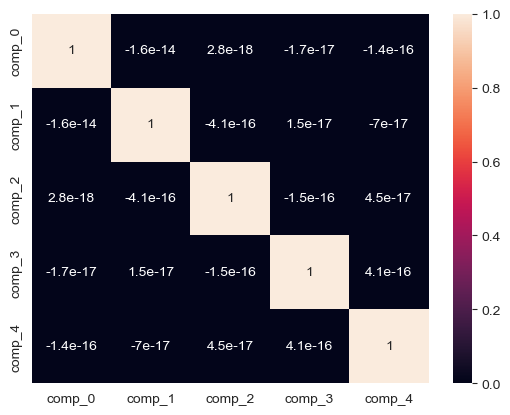

In [45]:
sns.heatmap(pc_scores.corr(), annot = True)

<Axes: >

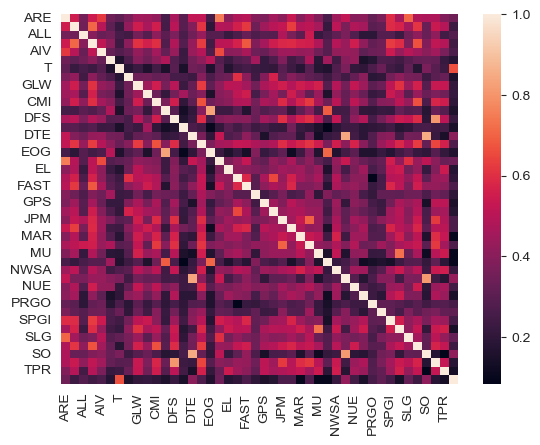

In [44]:
sns.heatmap(ret_stock.corr())

차원 축소된 시계열의 경우 계열관 상관성이 거의 제거가 된 모습을 볼 수 있다. 이는 statsmodel이 모델의 분석에 초점을 두었기 때문에, 최대한 계열 독립적인 factor로 만들어지도록 연산을 수행하기 때문이다

**sklearn**

sklearn의 연산은 statsmodel과 성격이 다른다

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 5)
pca.fit(ret_stock)

PCA(n_components=5)

In [22]:
pc_scores = pca.transform(ret_stock)

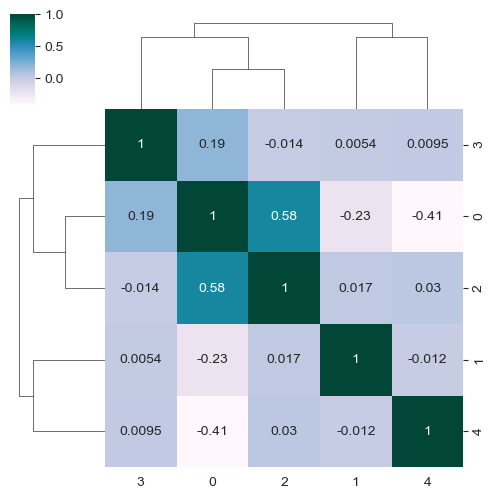

In [12]:
sns.clustermap(np.corrcoef(pca.components_), annot = True, figsize = (5,5), cmap = 'PuBuGn')

<Axes: >

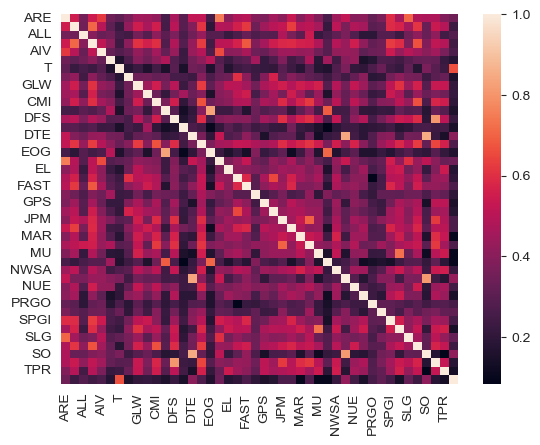

In [23]:
sns.heatmap(ret_stock.corr())

statsmodel의 연산과는 다르게, 축소된 성분 간 상관성이 완전히 제거되지는 않는다. 즉, 분석에 초점을 맞추기 보다 모형의 복잡도 감소를 위한 feature tuning에 초점을 맞췄기 때문이다. 두 모형 모두 해석에 유의해야 하지만, sklaern에서의 PCA는 특히 더욱 설명이 불가능하다

#### 2. K-means Clustering

<center><img src = "https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif" alt="My Image"></center>

Clustering에서 가장 유명한 비지도 학습 알고리즘 중 하나로, 원래 신호 처리 분야에서 나온 벡터 양자화 방법의 일종이다. n개의 관측값을 각 관측값이 가장 가까운 평균(국지적 평균)을 가진 클러스터에 속하는 k개의 클러스터로 분할하여 클러스터의 프로토타입 역할을 하는 것을 목표로 한다

K-Means Clustering에서 목적함수는 PCA와 같이 feature간의 분산을 작게 하는 것으로 지정되어 있지만 거리 척도는 Normal **Euclidean distance가 아니라는 점**을 알아둬야 한다

```
sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, 
                       tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
```

관측 행렬 $(\mathbf{x}_1, \mathbf{x}_2, ..., \mathbf{x}_n)$가 존재한다고 하자. 여기서 각 관측 벡터는 d차원 실수 벡터이다. k means clustering은 군집 내 분산을 최소화하기 위해 관측치를 $k( \geq n)$집합 $\mathbf{S} = \{S_1, S_2, \dots, S_k\}$로 분할하는 것을 목표로 한다

따라서, 목적함수는 다음과 같이 정의된다

$${\displaystyle \mathop {\operatorname {arg\,min} } _{\mathbf {S} }\sum _{i=1}^{k}\sum _{\mathbf {x} \in S_{i}}\left\|\mathbf {x} -{\boldsymbol {\mu }}_{i}\right\|^{2}=\mathop {\operatorname {arg\,min} } _{\mathbf {S} }\sum _{i=1}^{k}|S_{i}|\operatorname {Var} S_{i}}$$

여기서 $\mathbf{\mu}_i$는 군집 집합 $S_i$의 국소적 평균으로, 다음과 같이 정의된다

$${\displaystyle {\boldsymbol {\mu _{i}}}={\frac {1}{|S_{i}|}}\sum _{\mathbf {x} \in S_{i}}\mathbf {x} }$$

이는 도일한 군집에 있는 점들의 편차를 최소화하는 문제의 목적과 같다

$${\displaystyle \mathop {\operatorname {arg\,min} } _{\mathbf {S} }\sum _{i=1}^{k}\,{\frac {1}{|S_{i}|}}\,\sum _{\mathbf {x} ,\mathbf {y} \in S_{i}}\left\|\mathbf {x} -\mathbf {y} \right\|^{2}}$$

목적함수가 MSE를 최소화하는 문제로 귀결되는데, 이는 즉 **군집의 MSE를 최소화하는 결정 경계를 찾는 과정**이라고 생각하면 쉽다

**updating step**

clustering의 초기 단계는 다음과 같이 정의된다. 각 군집의 관측치의 nearest mean을 계산한다

$${\displaystyle S_{i}^{(t)}=\left\{x_{p}:\left\|x_{p}-m_{i}^{(t)}\right\|^{2}\leq \left\|x_{p}-m_{j}^{(t)}\right\|^{2}\ \forall j,1\leq j\leq k\right\}}$$

iteration을 추가할 때마다 다음과 같은 연산을 다시 수행한다

$${\displaystyle m_{i}^{(t+1)}={\frac {1}{\left|S_{i}^{(t)}\right|}}\sum _{x_{j}\in S_{i}^{(t)}}x_{j}}$$

#### example 2

example 1에서 가져온 종목 데이터의 공분산에 대해 K means clustering을 수행해 보자. 여기서 n_cluster는 3으로 지정하도록 한다

In [47]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

cov_matrix = ret_stock.cov()

n_clusters = 3
kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
kmeans.fit(cov_matrix)

labels = kmeans.labels_

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


공분산에 대해 clustering을 수행하였기 때문에, mean-variance 평면에 mapping할 수 있다

Text(0.5, 1.0, 'Mean-variance Clustering')

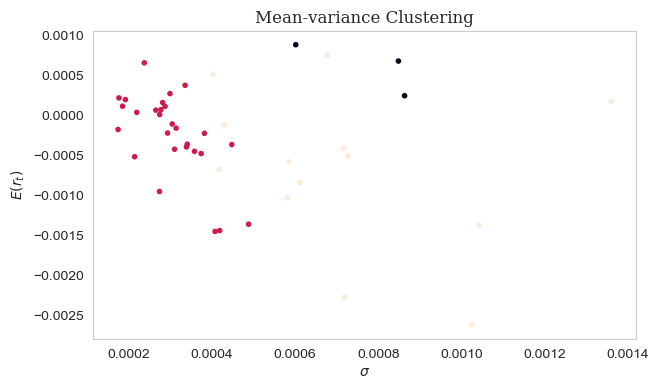

In [48]:
plt.figure(figsize = (7,4))
plt.scatter(ret_stock.var(axis = 0), ret_stock.mean(axis = 0), c = labels, marker = '.')
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$E(r_t)$')
plt.grid(False)
plt.title('Mean-variance Clustering', fontsize = 12, fontfamily = 'Serif')

clustering결과, 공분산과 return rate에 따라 군집이 되었다는 것을 확인할 수 있다. 즉, 종목의 공적분 계열이 비슷한것끼리 군집화 되었다고 판단할 수 있다

#### 3. DBSCAN

<center><img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/400px-DBSCAN-Illustration.svg.png" alt="My Image"></center>

DBSCAN은 1996년 Martin Ester, Hans-Peter Kriegel, Sander, Xiaowei Xu가 제안한 군집화 알고리즘이다. DBSCAN은 밀도 기반으로 추정하는 대표적인 non parametic method이다. 일부 공간에 점들이 집합되어 있을 때, 서로 밀접하게 모여 있는 점들을 그룹화하여 밀도가 낮은 공간에 홀로 놓여 있는 데이터들을 outlier로 가정한다. DBSCAN은 모형이 간단하고 연산 시간 대비 성능이 좋기 때문에, 가장 많이 사용되는 군집화 알고리즘 중 하나이다

```
sklearn.cluster.DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, 
                       algorithm='auto', leaf_size=30, p=None, n_jobs=None)
```

DBSCAN은 다음과 같은 과정을 통해 cluster를 출력한다

```
DBSCAN(DB, distFunc, eps, minPts) {
    C := 0                                                  /* Cluster counter */
    for each point P in database DB {
        if label(P) ≠ undefined then continue               /* Previously processed in inner loop */
        Neighbors N := RangeQuery(DB, distFunc, P, eps)     /* Find neighbors */
        if |N| < minPts then {                              /* Density check */
            label(P) := Noise                               /* Label as Noise */
            continue
        }
        C := C + 1                                          /* next cluster label */
        label(P) := C                                       /* Label initial point */
        SeedSet S := N \ {P}                                /* Neighbors to expand */
        for each point Q in S {                             /* Process every seed point Q */
            if label(Q) = Noise then label(Q) := C          /* Change Noise to border point */
            if label(Q) ≠ undefined then continue           /* Previously processed (e.g., border point) */
            label(Q) := C                                   /* Label neighbor */
            Neighbors N := RangeQuery(DB, distFunc, Q, eps) /* Find neighbors */
            if |N| ≥ minPts then {                          /* Density check (if Q is a core point) */
                S := S ∪ N                                  /* Add new neighbors to seed set */
            }
        }
    }
}
```

**optimization criterion**

DBSCAN의 목적함수는 다음과 같다. $C$는 모든 가능한 군집화 집합 ${\mathcal {C}}$의 부분집합 ${\displaystyle C=\{C_{1},\ldots ,C_{l}\}}$ 이며,군집 내 모든 pair point가 밀도 추정이 가능한 조건에서 군집의 수를 최소화한다

$${\displaystyle \min _{C\subset {\mathcal {C}},~d_{db}(p,q)\leq \varepsilon ~\forall p,q\in C_{i}~\forall C_{i}\in C}|C|}$$

#### example 3

DBSCAN을 이용하여 example 1의 과정을 수행하라. 여기서 eps = 0.0003이고 min_samples = 2로 지정한다

In [49]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

cov_matrix = ret_stock.cov()

dbscan = DBSCAN(eps = 0.0003, min_samples = 2)
clusters = dbscan.fit_predict(cov_matrix)

DBSCAN에서의 parameter eps는 epsilon의 약자로, 샘플들간의 최대 거리를 지정해 주는 parameter이다. 금융 시계열의 distance는 대개 퍼센테이지로 표현되기 때문에 작은 값을 지정해 주어야 한다.
 
min_samples는 cluster_mean을 추정할 때 계산되는 관측치의 개수를 지정해 주는 parameter로, 값이 작을수록 과적합 위험이 높다. 다만, 이 값은 sample의 개수가 몇개인지에 따라 달라질 수 있다

Text(0.5, 1.0, 'Mean-variance Clustering')

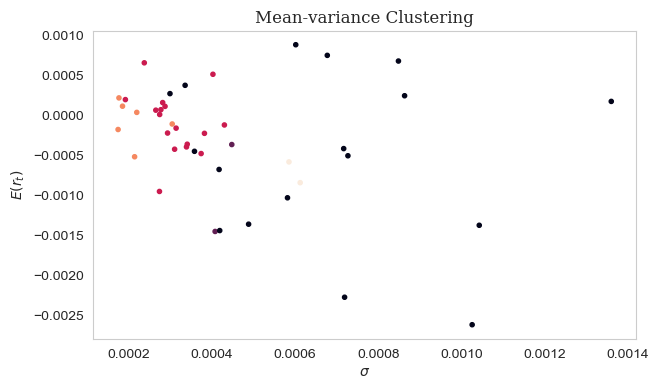

In [16]:
plt.figure(figsize = (7,4))
plt.scatter(ret_stock.var(axis = 0), ret_stock.mean(axis = 0), c = clusters, marker = '.')
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$E(r_t)$')
plt.grid(False)
plt.title('Mean-variance Clustering', fontsize = 12, fontfamily = 'Serif')

군집화의 개수를 지정하는 것이 아닌 거리 기준에 따라 최소의 군집으로 추정해 주기 때문에 공통 성분을 가진 군집끼리 분류되는 경향이 크다. 데이터간에 차이가 없을 수록 더 적은 군집으로 추정되고, 계열간 상관성이 작을수록 더 많은 군집으로 최적화한다

자산배분에서는 계열 상관성이 작은 자산끼리 aggregating하기 때문에 clustering이 굉장히 유용한다

In [57]:
cluster_tick = pd.DataFrame({'cluster' : clusters}, index = ret_stock.columns)
cluster_tick.head()

,cluster
ARE,0
ALLE,1
ALL,-1
AME,1
AIV,0


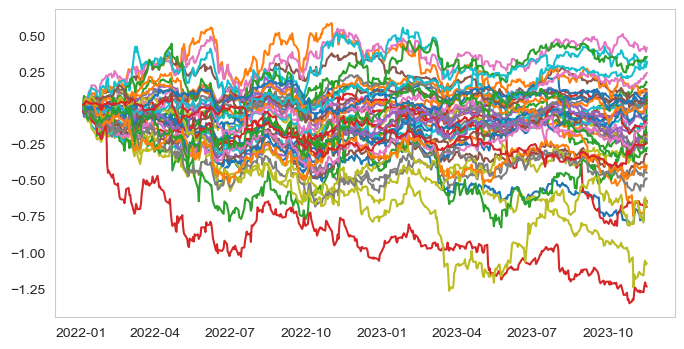

In [54]:
plt.figure(figsize = (8,4))
plt.plot(ret_stock.cumsum())
plt.grid(False)
plt.show()

In [66]:
cluster_tick

,cluster
ARE,0
ALLE,1
ALL,-1
AME,1
AIV,0
ADM,-1
T,2
CHRW,1
GLW,1
COST,1


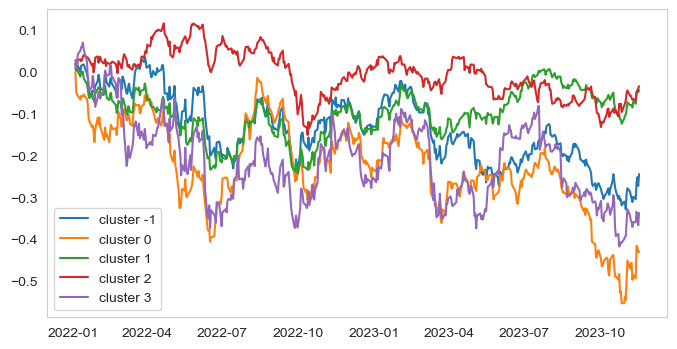

In [71]:
plt.figure(figsize = (8, 4))
for i in range(-1, 4) :
    plt.plot(ret_stock.loc[:, cluster_tick[cluster_tick['cluster'] == i].index].mean(axis = 1).cumsum(), label = 'cluster ' + str(i))
plt.grid(False)
plt.legend()
plt.show()

#### 4. Hierarchical Principal Components Analysis



In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

correlation = ret_stock.corr()
distances = np.sqrt((1 - correlation) / 2)
clusters = linkage(squareform(distances), method="single")

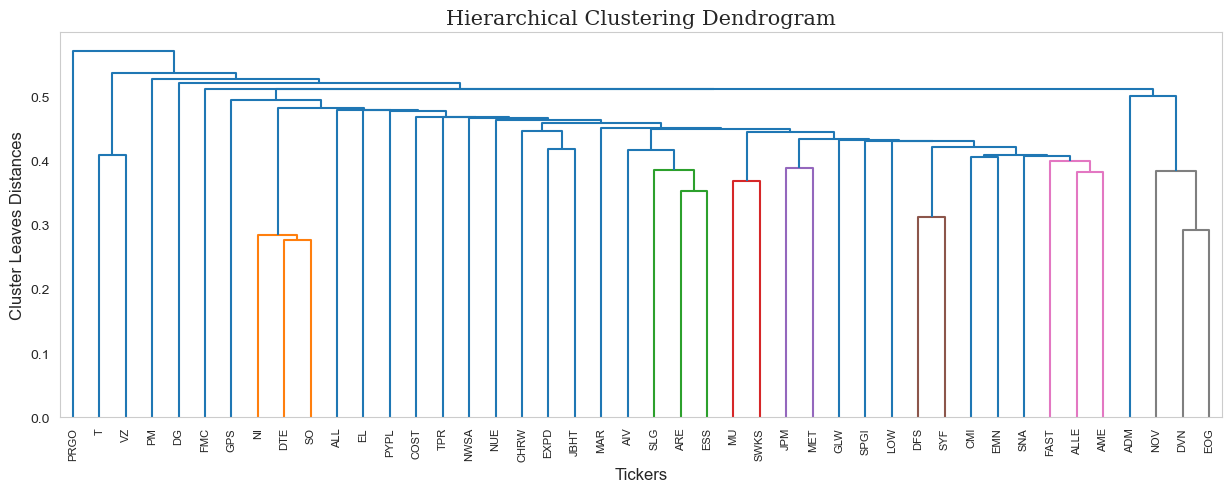

In [19]:
columns = ret_stock.columns
plt.figure(figsize=(15, 5))
dendrogram(clusters, labels=columns)
plt.xlabel('Tickers', fontsize=12)
plt.ylabel('Cluster Leaves Distances', fontsize=12)
plt.grid(False)
plt.title('Hierarchical Clustering Dendrogram', fontsize = 15, fontfamily = 'Serif')
plt.show()

/var/folders/1q/pl9tj55n57s9jg28npxw61n80000gn/T/ipykernel_19883/4249329823.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


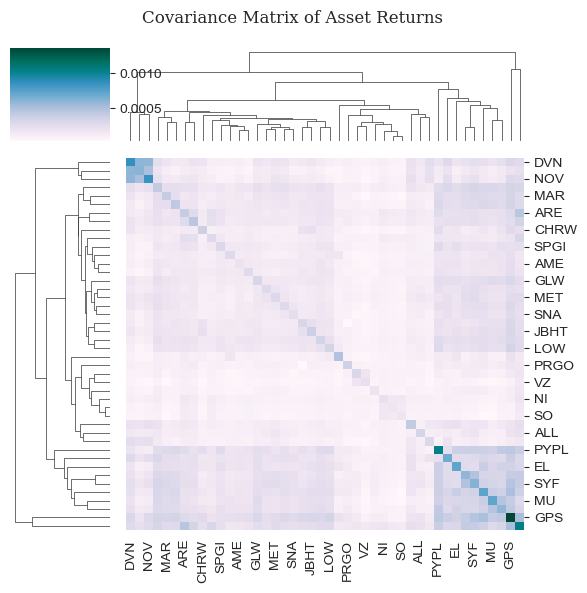

In [21]:
covariance = ret_stock.cov()
g = sns.clustermap(covariance, figsize = (6, 6), cmap = 'PuBuGn')
g.fig.suptitle('Covariance Matrix of Asset Returns', fontsize = 12, fontfamily = 'Serif')
plt.tight_layout()
plt.show()

/var/folders/1q/pl9tj55n57s9jg28npxw61n80000gn/T/ipykernel_19883/3755362694.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


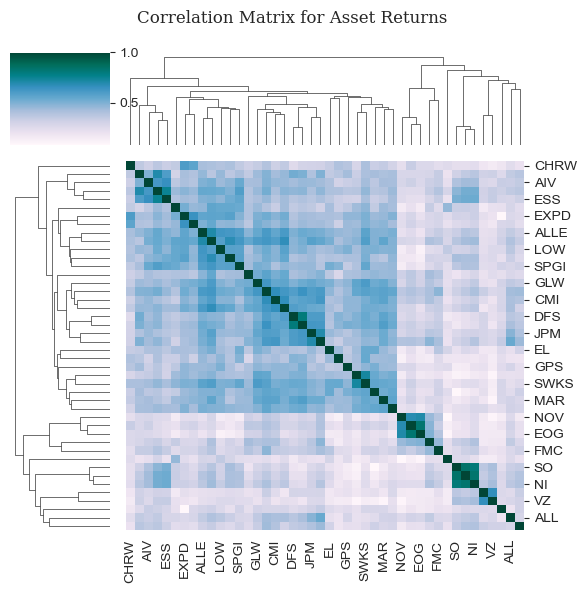

In [20]:
g = sns.clustermap(correlation, figsize = (6, 6), cmap = 'PuBuGn')
g.fig.suptitle('Correlation Matrix for Asset Returns', fontsize=12, fontfamily='Serif')
plt.tight_layout()
plt.show()